In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sn;sn.set()
from sklearn.datasets.samples_generator import make_blobs



from sklearn.metrics import accuracy_score,confusion_matrix

C:\Users\LENOVO\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
x,y_true=make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=0.6)

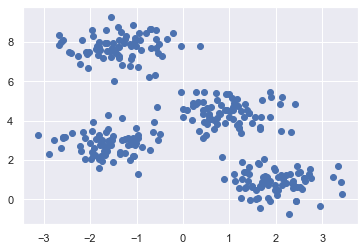

In [3]:
plt.scatter(x[:,0],x[:,1])

In [4]:
from sklearn.cluster  import KMeans

km=KMeans(n_clusters=4)
model1=km.fit(x)
y_model1=model1.predict(x)

In [5]:
accuracy_score(y_true,y_model1)

confusion_matrix(y_true,y_model1)

array([[ 0,  0,  0, 75],
       [ 0, 75,  0,  0],
       [ 0,  0, 75,  0],
       [75,  0,  0,  0]], dtype=int64)

In [6]:
#scratch model
#test each and every line for understanding

from sklearn.metrics import pairwise_distances_argmin

def Find_clusters(x_samples,n_clusters,rseed=2):
    rng=np.random.RandomState(rseed)
    random_series=rng.permutation(x_samples.shape[0])
    i=random_series[:n_clusters]
    centers=x_samples[i]
    while True:
        labels=pairwise_distances_argmin(x,centers)
        new_centers=np.array([x[labels==i].mean(0) for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers=new_centers
    return centers,labels
centers,labels=Find_clusters(x,4)

        

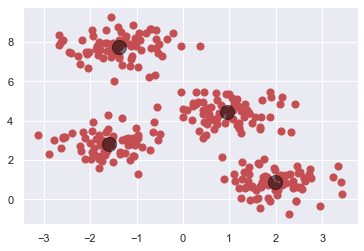

In [7]:
plt.scatter(x[:,0],x[:,1],s=50,c="r")
plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5)

# image compression 

In [8]:
from sklearn.datasets import load_sample_image

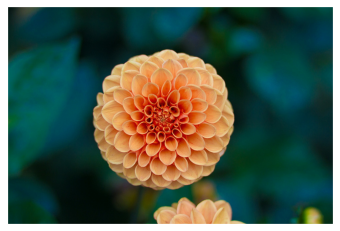

In [9]:
flower=load_sample_image('flower.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(flower)

In [10]:
flower.shape

(427, 640, 3)

In [11]:
data=flower/225#most important step
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [12]:
def plot_pixels(data,title,colors=None,n=5000):
    if np.all(colors==None):
        colors=data
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:n]
    colors=colors[i]
    R,G,B=data[i].T
    
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
    ax[0].scatter(R,G,c=colors[:,2],marker=".")
    ax[0].set(xlabel="Red",ylabel="Green",xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,c=colors[:,2],marker=".")
    ax[1].set(xlabel="Red",ylabel="Blue",xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=20)

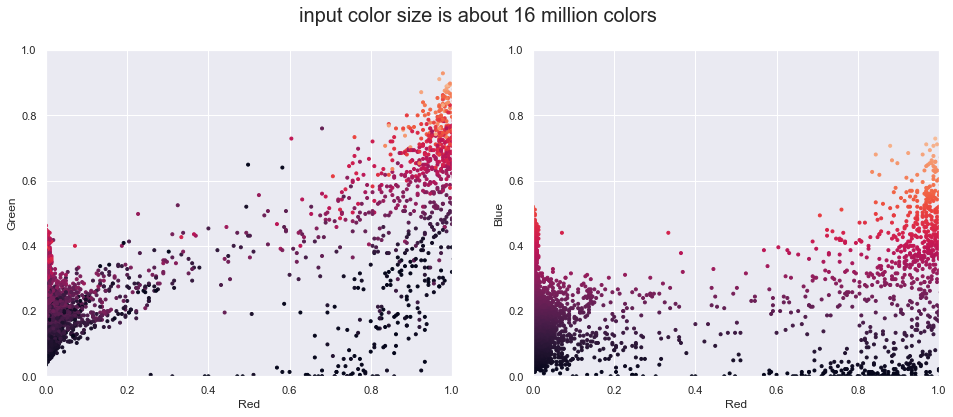

In [13]:

plot_pixels(data,"input color size is about 16 million colors")

In [15]:
# model2.predict(data)

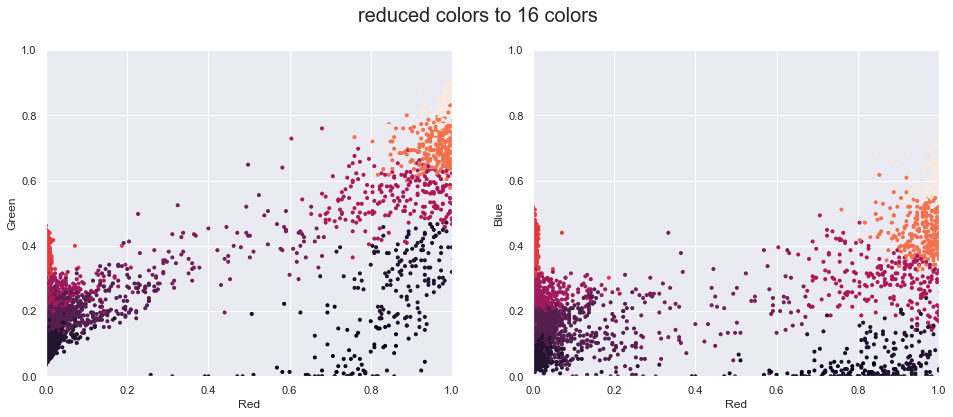

In [16]:
#import warnings;warnings.simplefilter("ignore")
from sklearn.cluster import MiniBatchKMeans

mini_k=MiniBatchKMeans(10)
model2=mini_k.fit(data)
new_colors=model2.cluster_centers_[model2.predict(data)]

plot_pixels(data,title="reduced colors to 16 colors",colors=new_colors)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'compressed')

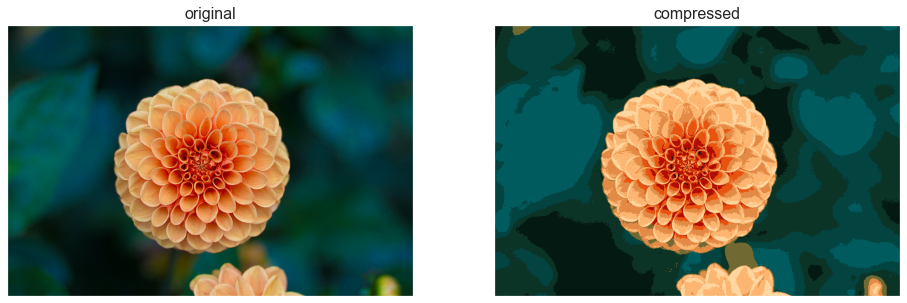

In [17]:
flower_reloaded=new_colors.reshape(flower.shape)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(flower)
ax[0].set_title("original",size=16)

ax[1].imshow(flower_reloaded)
ax[1].set_title("compressed",size=16)

In [18]:
from PIL import Image

In [19]:
jag=Image.open('./jag1.jng.jpg')


In [20]:
import imageio


In [21]:
data1=imageio.imread('jag1.jng.jpg')
jag=data1
data1=data1/225
print(data1.shape)
data1=data1.reshape(640*960,3)

(640, 960, 3)


In [ ]:
import warnings;warnings.simplefilter("ignore")
from sklearn.cluster import MiniBatchKMeans

mini_k=MiniBatchKMeans(10000)
model3=mini_k.fit(data1)
new_colors1=model3.cluster_centers_[model3.predict(data1)]

plot_pixels(data1,title="reduced colors to 16 colors",colors=new_colors)

In [ ]:
#model3.cluster_centers_[model3.predict(data1)].shape
#data1.shape

In [ ]:
jag_reloaded=new_colors1.reshape(jag.shape)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(jag)
ax[0].set_title("original",size=16)

ax[1].imshow(jag_reloaded)
ax[1].set_title("compressed",size=16)